Predict popular song on chart

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# โหลดข้อมูล
df = pd.read_csv("spotify_youtube_data_final.csv")  # แทนที่ด้วยไฟล์ของคุณ

# เลือก Features และ Target
features = ["bpm", "danceability%", "energy%", "acousticness%", "streams", "views", "likes"]
target = "rank"

# ลบแถวที่มีค่าหายไป
df = df.dropna(subset=features + [target])

# แยก Features และ Target
X = df[features]
y = df[target]

# แบ่งข้อมูลเป็น Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize ข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [3]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [4]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print("-" * 50)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Results for Linear Regression:
MAE: 45.1686
MSE: 2859.1446
RMSE: 53.4710
R² Score: 0.1894
--------------------------------------------------
Results for Random Forest:
MAE: 28.8576
MSE: 1316.7029
RMSE: 36.2864
R² Score: 0.6267
--------------------------------------------------
Results for XGBoost:
MAE: 30.1183
MSE: 1464.6690
RMSE: 38.2710
R² Score: 0.5847
--------------------------------------------------


In [6]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression with L2 regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression with L1 regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


In [7]:
rf = RandomForestRegressor(
    n_estimators=200,        # เพิ่มจำนวนต้นไม้
    max_depth=15,            # กำหนดความลึกของต้นไม้
    min_samples_split=5,     # จำนวนตัวอย่างขั้นต่ำที่จะแยก
    min_samples_leaf=2,      # จำนวนตัวอย่างขั้นต่ำในใบ
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,       # ลดอัตราการเรียนรู้เพื่อการปรับตัวที่ละเอียดขึ้น
    max_depth=10,             # ความลึกของต้นไม้
    subsample=0.8,            # ใช้ข้อมูลบางส่วนในการเทรนแต่ละรอบ
    colsample_bytree=0.8,     # ใช้ฟีเจอร์บางส่วนในการเทรนแต่ละต้นไม้
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [9]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest Cross-Validated R²: {rf_scores.mean():.4f}")

xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')
print(f"XGBoost Cross-Validated R²: {xgb_scores.mean():.4f}")


Random Forest Cross-Validated R²: 0.6315
XGBoost Cross-Validated R²: 0.6138


In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [11]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print("-" * 50)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Results for Linear Regression:
MAE: 45.1686
MSE: 2859.1446
RMSE: 53.4710
R² Score: 0.1894
--------------------------------------------------
Results for Random Forest:
MAE: 28.5385
MSE: 1284.5167
RMSE: 35.8402
R² Score: 0.6358
--------------------------------------------------
Results for XGBoost:
MAE: 29.0018
MSE: 1331.9320
RMSE: 36.4956
R² Score: 0.6224
--------------------------------------------------


วิเคราะห์ความสัมพันธ์ของ YouTube และ Spotify

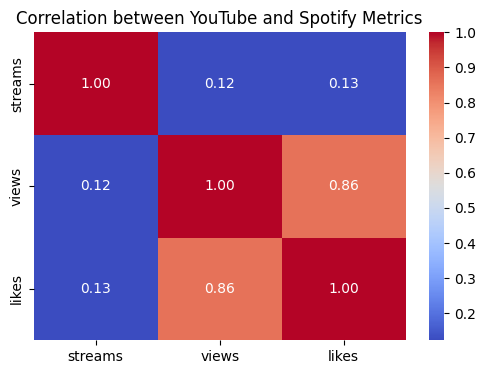

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณ Correlation ระหว่าง views, likes (YouTube) และ streams (Spotify)
correlation_matrix = df[["streams", "views", "likes"]].corr()

# แสดง Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between YouTube and Spotify Metrics")
plt.show()


 วิเคราะห์ปัจจัยที่มีผลต่ออันดับเพลง

/tmp/ipykernel_1042/3820896530.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="Blues_r")


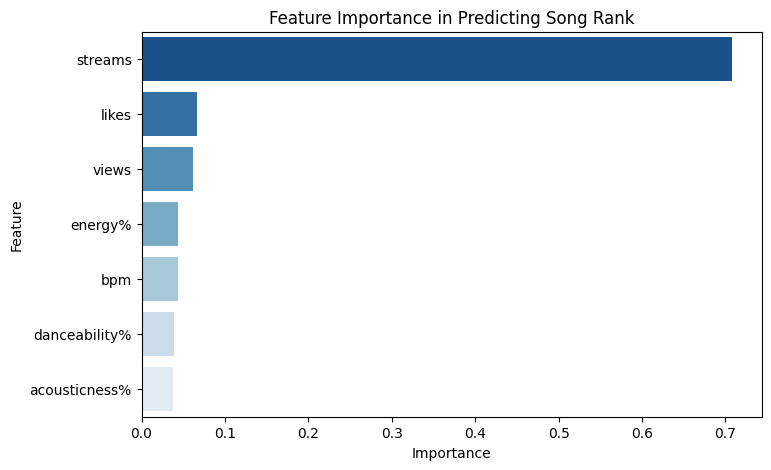

In [7]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# แสดงผล Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="Blues_r")
plt.title("Feature Importance in Predicting Song Rank")
plt.show()
